# Prueba - Fundamentos Data Science | Desafío 2: Rendimiento escolar
### Cristian Vidal Muñoz

# Prueba - Hito 1

### Objetivo
Completar el punto de __Preliminares__, así como __Aspectos computacionales__.

__Elementos a considerar__
* Los dos enunciados deben estar clarificados, considerando el tipo de problema a resolver (regresión o clasificación). Para cada uno de los enunciados y su problema identificado, se debe justificar el uso de métricas para medir el desempeño del problema. __(3 puntos)__
* Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación. __(1 punto)__
* Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos. __(1punto)__

__INTRODUCCIÓN PROBLEMA:__

Con el objetivo de identificar a los alumnos que presentan un bajo desempeño académico en una escuela Portuguesa, debemos desarrollar un modelo predictivo sobre el promedio final de un alumno en base a una serie de atributos sociodemográficos, conductuales y aspectos ambientales.

__TIPO DE PROYECTO__

Este caso vamos a implementar un predictor de __regresión lineal múltiple__, donde tenemos que predecir un valor numérico continuo, queremos predecir el promedio final de un alumno, para este algoritmo necesitamos 
obtener la relación entre variables independientes (X) y una variable dependiente (Y). El algoritmo de machine learning que utilizaremos sera __LinearRegression__. Para determinar cuáles van a ser los principales atributos a incluir en el modelo lo haremos mediante la generación de correlaciones parciales entre cada atributo y el vector objetivo.

__MÉTRICAS__

Algunas de las métricas que utilizaremos para evaluar el desempeño y precisión de nuestro modelo serán: Promedio del Error Cuadrático __(Mean Squared Error)__ y el estadístico __R-cuadrado__.

__LIBRERÍAS Y MÓDULOS__

Desarrollaremos este caso utilizando la __Suite__ de __Anaconda python__. Para la manipulación, operaciones y preparación de los datos usaremos __Pandas__ y __NumPy__. Para la visualización de los datos utilizaremos __missingno (matrix)__, __matplotlib (plt)__ y __Seaborn (sns)__. Nuestro análisis estadístico y econométrico lo haremos con __Statsmodels (ols)__. Los algoritmos de Machine Learning, validación y metricas de desempeño utilizaremos __Scikit-learn (LinearRegression, train_test_split, mean_squared_error, r2_score)__.

# Prueba - Hito 2

### Objetivo

Completar el punto de __Descripción__.

sección llamada __Descripción__ donde se generará un análisis descriptivo considerando el
tipo de variables (desde el punto de vista estadístico así como computacional). Esta sección
debe considerar medidas univariadas/ frecuencias, datos perdidos y gráficos distributivos sobre
las variables a analizar. A partir de ésta se debe clarificar la estrategia de preprocesamiento
(datos perdidos, recodificaciones).

### Elementos a considerar
* La inspección visual del vector objetivo. (2 puntos)
* La inspección visual de las variables. (2 puntos)
* La inspección de datos perdidos en las variables. (1 punto)

De ser necesario, se puede iterar en el proceso de preprocesamiento y recodificación de las variables

In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

#Importamos funciones auxiliares
import helpers as funcion_auxiliar

#Configuración de graficos
plt.style.use('ggplot')

#Ignorar Avisos
import warnings
warnings.filterwarnings("ignore")

## Aspectos adicionales a considerar

* La base de datos presenta una serie de anomalías. En la escuela no tienen buenas prácticas sobre cómo ingresar datos, por lo que existen datos perdidos que están registrados bajo tres categorías: nulidade, sem validade, zero. De manera adicional, hay 3 variables numéricas que se registraron como strings, cuya interpretación en pandas devuelve una estructura de datos genérica. Finalmente, la base está con un encoding distinto al normal y los delimitadores son distintos.

In [2]:
df = pd.read_csv('students.csv', sep='|', encoding='iso-8859-1').drop(columns = 'Unnamed: 0', axis = 1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


* Corregir datos Perdidos nulidade, sem validade, zero

In [3]:
df = df.replace('nulidade', np.nan)
df = df.replace('sem validade', np.nan)
df = df.replace('zero',np.nan)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,NaN,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


* Corregir variables (age, goout, health) numéricas que se registraron como strings

In [4]:
df['age'] = df['age'].astype(str).str.replace("\"", "")
df['age'] = df['age'].astype('float32')

df['goout'] = df['goout'].astype(str).str.replace("\"", "")
df['goout'] = df['goout'].astype('float32')

df['health'] = df['health'].astype(str).str.replace("\"", "")
df['health'] = df['health'].astype('float32')

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,4.0,1,1,3.0,6,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3.0,1,1,3.0,4,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2.0,2,3,3.0,10,NaN,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2.0,1,1,5.0,2,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,4,3,2.0,1,2,5.0,4,6,10,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        390 non-null object
sex           392 non-null object
age           391 non-null float32
address       393 non-null object
famsize       391 non-null object
Pstatus       389 non-null object
Medu          392 non-null object
Fedu          390 non-null object
Mjob          389 non-null object
Fjob          395 non-null object
reason        391 non-null object
guardian      391 non-null object
traveltime    392 non-null object
studytime     390 non-null object
failures      390 non-null object
schoolsup     387 non-null object
famsup        390 non-null object
paid          394 non-null object
activities    390 non-null object
nursery       389 non-null object
higher        389 non-null object
internet      392 non-null object
romantic      393 non-null object
famrel        390 non-null object
freetime      393 non-null object
goout         390 non-null float32
Dalc     

## Inspección de datos perdidos en las variables

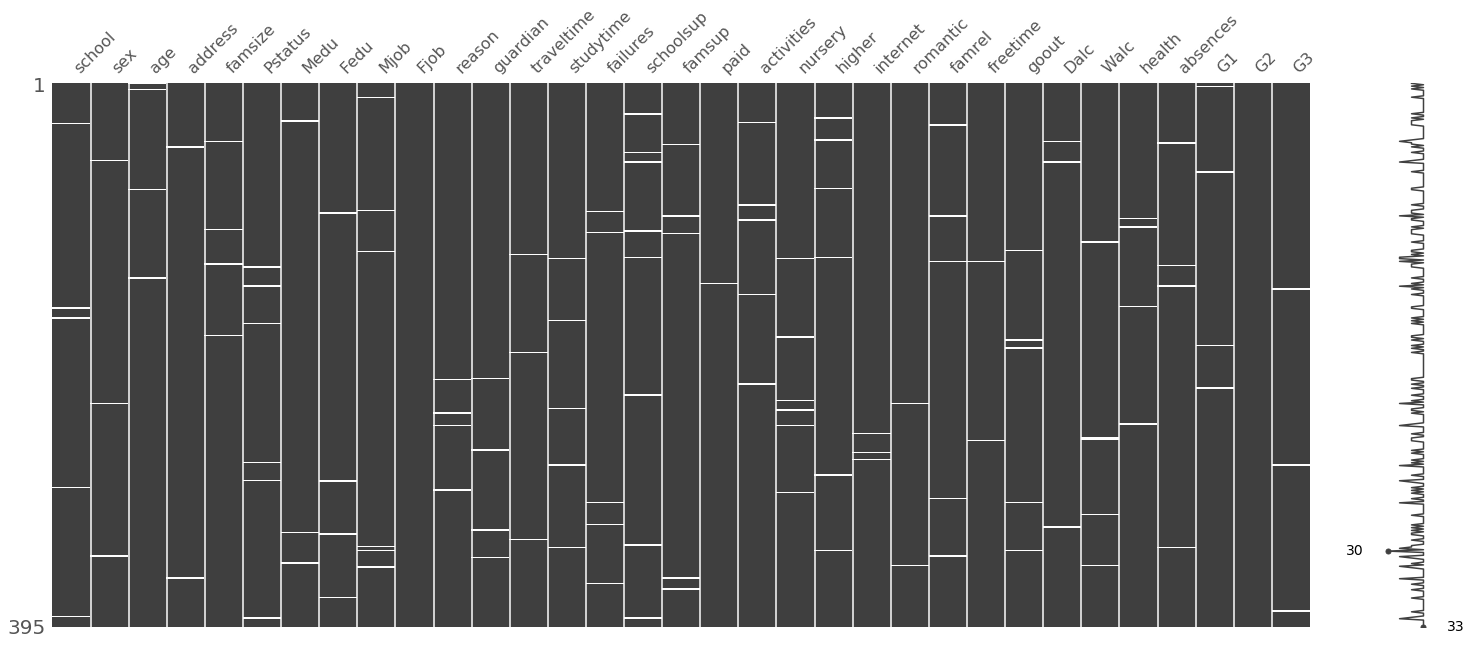

In [7]:
missingno.matrix(df)

In [8]:
df.isnull().sum()

school        5
sex           3
age           4
address       2
famsize       4
Pstatus       6
Medu          3
Fedu          5
Mjob          6
Fjob          0
reason        4
guardian      4
traveltime    3
studytime     5
failures      5
schoolsup     8
famsup        5
paid          1
activities    5
nursery       6
higher        6
internet      3
romantic      2
famrel        5
freetime      2
goout         5
Dalc          3
Walc          5
health        4
absences      4
G1            4
G2            0
G3            3
dtype: int64

__Podemos ver que practicamente todas las columnas tienen datos perdidos, pero no superan los 8 registros__

In [9]:
print("DataFrame sin aplicar dropna")
print("Cantidad de registros:{}, Cantidad de columnas: {}".format(df.shape[0], df.shape[1]))

DataFrame sin aplicar dropna
Cantidad de registros:395, Cantidad de columnas: 33


In [10]:
df_dropped = df.dropna()
print("DataFrame aplicando dropna")
print("Cantidad de registros:{}, Cantidad de columnas: {}".format(df_dropped.shape[0], df_dropped.shape[1]))

DataFrame aplicando dropna
Cantidad de registros:284, Cantidad de columnas: 33


__Eliminamos 111 registros de nuestra muestra__

## Proceso de preprocesamiento y recodificación de las variables

* Para simplficar el análisis y su posterior inclusión en un modelo predictivo, se sugiere recodificar las variables binarias como 0 y 1. Se recomienda seguir en criterio de asignarle 1 a aquellas categorías minoritarias.

* El procedimiento también debe aplicarse para aquelas variables nominales con más de 2 categorías siguiendo la misma lógica.

In [11]:
# Para las variables con valores yes / no
d = {'yes': 1, 'no': 0}
df_dropped['schoolsup'] = df_dropped['schoolsup'].map(d)
df_dropped['famsup'] = df_dropped['famsup'].map(d)
df_dropped['paid'] = df_dropped['paid'].map(d)
df_dropped['activities'] = df_dropped['activities'].map(d)
df_dropped['nursery'] = df_dropped['nursery'].map(d)
df_dropped['higher'] = df_dropped['higher'].map(d)
df_dropped['internet'] = df_dropped['internet'].map(d)
df_dropped['romantic'] = df_dropped['romantic'].map(d)

# Para las variables categoricas
df_dropped['school'] = df_dropped['school'].map({'MS': 1, 'GP': 0})
df_dropped['sex'] = df_dropped['sex'].map({'M': 1, 'F': 0})
df_dropped['address'] = df_dropped['address'].map({'R': 1, 'U': 0})
df_dropped['famsize'] = df_dropped['famsize'].map({'LE3': 1, 'GT3': 0})
df_dropped['Pstatus'] = df_dropped['Pstatus'].map({'A': 1, 'T': 0})

# Para las variables nominales
df_dropped['Mjob'] = df_dropped['Mjob'].map({'health': 0, 'teacher': 1, 'at_home': 2, 'services': 3, 'other': 4})
df_dropped['Fjob'] = df_dropped['Fjob'].map({'health': 0, 'at_home': 1, 'teacher': 2, 'services': 3, 'other': 4})
df_dropped['reason'] = df_dropped['reason'].map({'reputation': 0, 'home': 1, 'course': 2, 'other': 3})
df_dropped['guardian'] = df_dropped['guardian'].map({'father': 0, 'mother': 1, 'other': 2})

df_dropped['schoolsup'] = df_dropped['schoolsup'].astype('float32')
df_dropped['famsup'] = df_dropped['famsup'].astype('float32')
df_dropped['paid'] = df_dropped['paid'].astype('float32')
df_dropped['activities'] = df_dropped['activities'].astype('float32')
df_dropped['nursery'] = df_dropped['nursery'].astype('float32')
df_dropped['higher'] = df_dropped['higher'].astype('float32')
df_dropped['internet'] = df_dropped['internet'].astype('float32')
df_dropped['romantic'] = df_dropped['romantic'].astype('float32')
df_dropped['school'] = df_dropped['school'].astype('float32')
df_dropped['sex'] = df_dropped['sex'].astype('float32')
df_dropped['address'] = df_dropped['address'].astype('float32')
df_dropped['famsize'] = df_dropped['famsize'].astype('float32')
df_dropped['Pstatus'] = df_dropped['Pstatus'].astype('float32')
df_dropped['Mjob'] = df_dropped['Mjob'].astype('float32')
df_dropped['Fjob'] = df_dropped['Fjob'].astype('float32')
df_dropped['reason'] = df_dropped['reason'].astype('float32')
df_dropped['guardian'] = df_dropped['guardian'].astype('float32')
df_dropped['absences'] = df_dropped['absences'].astype('float32')

df_dropped['G1'] = df_dropped['G1'].astype('float32')
df_dropped['G2'] = df_dropped['G2'].astype('float32')
df_dropped['G3'] = df_dropped['G3'].astype('float32')

## Inspección visual de las variables

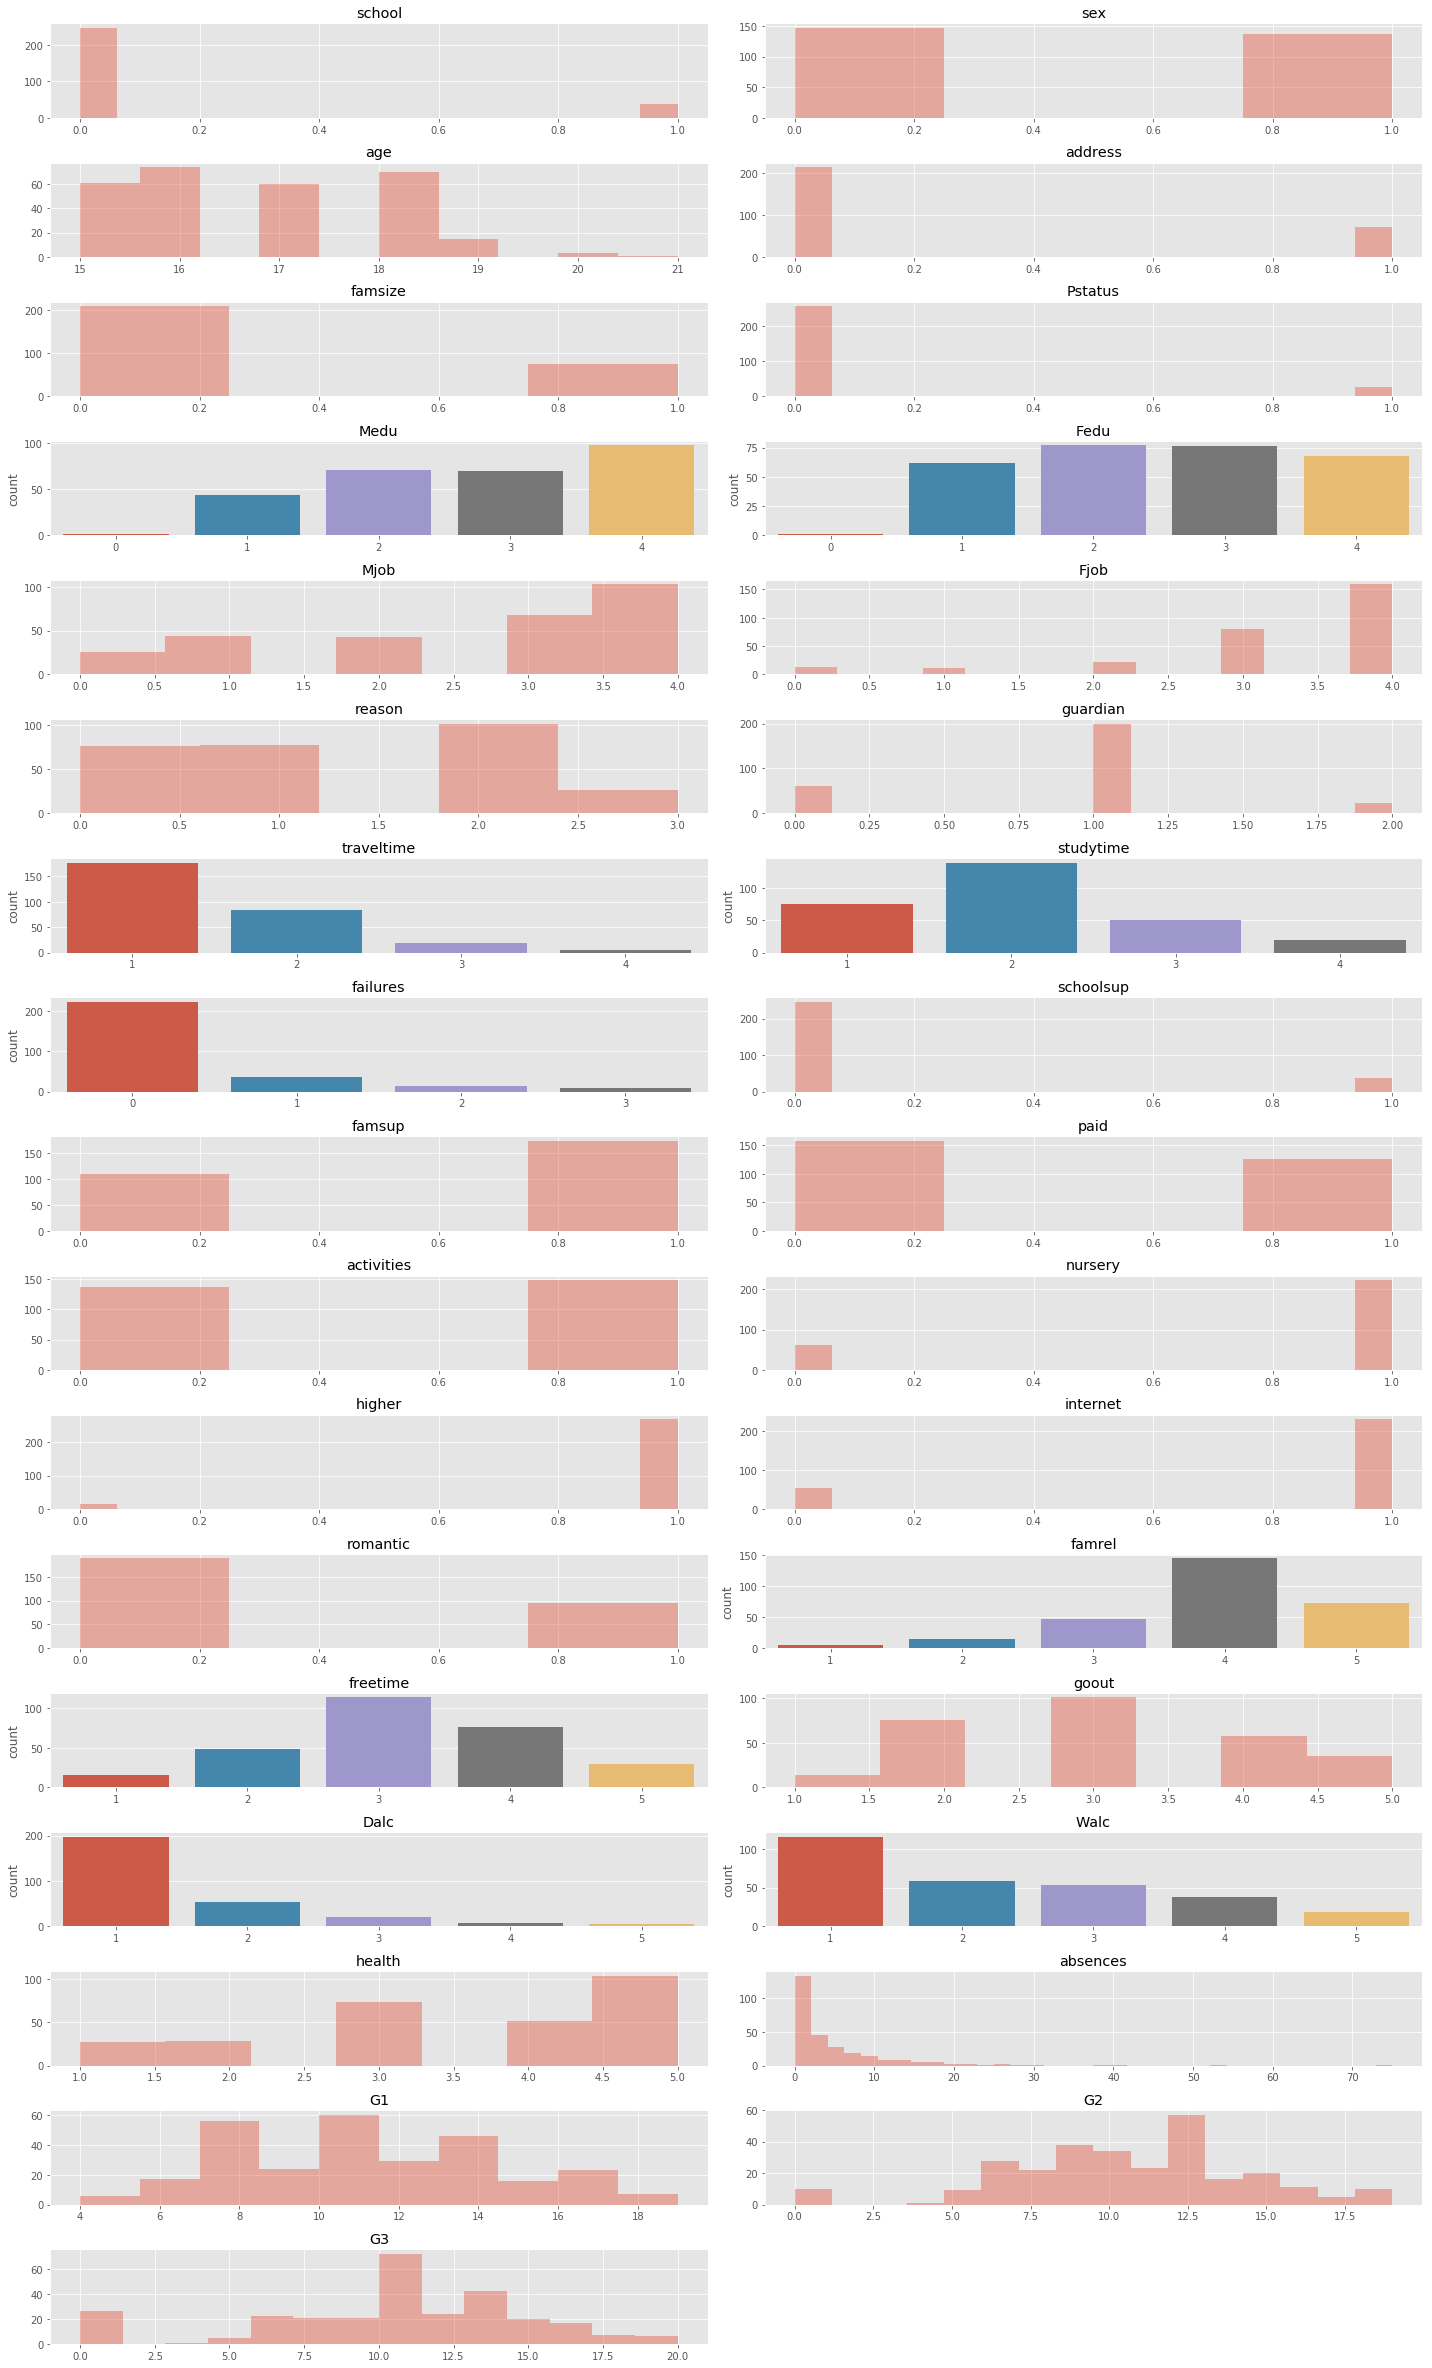

In [12]:
plt.rcParams['figure.figsize'] = (20, 33)
funcion_auxiliar.explorar_variables(df_dropped)

In [13]:
round(df_dropped['school'].value_counts('%'), 2)

0.0    0.87
1.0    0.13
Name: school, dtype: float64

In [14]:
round(df_dropped['sex'].value_counts('%'), 2)

0.0    0.52
1.0    0.48
Name: sex, dtype: float64

In [15]:
round(df_dropped['age'].value_counts('%'),2)

16.0    0.26
18.0    0.25
15.0    0.21
17.0    0.21
19.0    0.05
20.0    0.01
21.0    0.00
Name: age, dtype: float64

In [16]:
round(df_dropped['address'].value_counts('%'), 2)

0.0    0.75
1.0    0.25
Name: address, dtype: float64

In [17]:
round(df_dropped['famsize'].value_counts('%'), 2)

0.0    0.74
1.0    0.26
Name: famsize, dtype: float64

In [18]:
round(df_dropped['Pstatus'].value_counts('%'), 2)

0.0    0.9
1.0    0.1
Name: Pstatus, dtype: float64

In [19]:
round(df_dropped['Medu'].value_counts('%'), 2)

4    0.35
2    0.25
3    0.25
1    0.15
0    0.00
Name: Medu, dtype: float64

In [20]:
round(df_dropped['Fedu'].value_counts('%'), 2)

2    0.27
3    0.27
4    0.24
1    0.22
0    0.00
Name: Fedu, dtype: float64

In [21]:
round(df_dropped['schoolsup'].value_counts('%'), 2)

0.0    0.87
1.0    0.13
Name: schoolsup, dtype: float64

In [22]:
round(df_dropped['paid'].value_counts('%'), 2)

0.0    0.56
1.0    0.44
Name: paid, dtype: float64

In [23]:
round(df_dropped['activities'].value_counts('%'), 2)

1.0    0.52
0.0    0.48
Name: activities, dtype: float64

In [24]:
round(df_dropped['nursery'].value_counts('%'), 2)

1.0    0.79
0.0    0.21
Name: nursery, dtype: float64

In [25]:
round(df_dropped['higher'].value_counts('%'), 2)

1.0    0.95
0.0    0.05
Name: higher, dtype: float64

In [26]:
round(df_dropped['internet'].value_counts('%'), 2)

1.0    0.81
0.0    0.19
Name: internet, dtype: float64

In [27]:
round(df_dropped['romantic'].value_counts('%'), 2)

0.0    0.67
1.0    0.33
Name: romantic, dtype: float64

In [28]:
round(df_dropped['Mjob'].value_counts('%'), 2)

4.0    0.36
3.0    0.24
1.0    0.15
2.0    0.15
0.0    0.09
Name: Mjob, dtype: float64

In [29]:
round(df_dropped['Fjob'].value_counts('%'), 2)

4.0    0.56
3.0    0.28
2.0    0.07
0.0    0.05
1.0    0.04
Name: Fjob, dtype: float64

In [30]:
round(df_dropped['reason'].value_counts('%'), 2)

2.0    0.36
1.0    0.27
0.0    0.27
3.0    0.10
Name: reason, dtype: float64

In [31]:
round(df_dropped['guardian'].value_counts('%'), 2)

1.0    0.70
0.0    0.21
2.0    0.08
Name: guardian, dtype: float64

In [32]:
round(df_dropped['traveltime'].value_counts('%'), 2)

1    0.62
2    0.30
3    0.06
4    0.02
Name: traveltime, dtype: float64

In [33]:
round(df_dropped['studytime'].value_counts('%'), 2)

2    0.49
1    0.26
3    0.18
4    0.07
Name: studytime, dtype: float64

In [34]:
round(df_dropped['failures'].value_counts('%'), 2)

0    0.79
1    0.13
2    0.05
3    0.04
Name: failures, dtype: float64

In [35]:
round(df_dropped['famsup'].value_counts('%'), 2)

1.0    0.61
0.0    0.39
Name: famsup, dtype: float64

In [36]:
round(df_dropped['famrel'].value_counts('%'), 2)

4    0.51
5    0.26
3    0.17
2    0.05
1    0.02
Name: famrel, dtype: float64

In [37]:
round(df_dropped['freetime'].value_counts('%'), 2)

3    0.40
4    0.27
2    0.17
5    0.10
1    0.06
Name: freetime, dtype: float64

In [38]:
round(df_dropped['goout'].value_counts('%'), 2)

3.0    0.36
2.0    0.27
4.0    0.20
5.0    0.12
1.0    0.05
Name: goout, dtype: float64

In [39]:
round(df_dropped['Dalc'].value_counts('%'), 2)

1    0.70
2    0.19
3    0.07
4    0.03
5    0.02
Name: Dalc, dtype: float64

In [40]:
round(df_dropped['Walc'].value_counts('%'), 2)

1    0.41
2    0.20
3    0.19
4    0.13
5    0.06
Name: Walc, dtype: float64

In [41]:
round(df_dropped['health'].value_counts('%'), 2)

5.0    0.37
3.0    0.26
4.0    0.18
2.0    0.10
1.0    0.10
Name: health, dtype: float64

## Visualizar Estadísticas descriptivas

In [42]:
df_dropped.describe()

,school,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,...,nursery,higher,internet,romantic,goout,health,absences,G1,G2,G3
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.00000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,0.130282,0.482394,16.707747,0.246479,0.264085,0.09507,2.626760,3.271127,1.278169,0.873239,...,0.785211,0.947183,0.813380,0.334507,3.084507,3.626760,5.588028,10.933099,10.640845,10.394366
std,0.337207,0.500572,1.284239,0.431722,0.441623,0.29383,1.350875,1.063568,0.967720,0.529806,...,0.411401,0.224062,0.390294,0.472651,1.076528,1.319112,8.156332,3.289196,3.789221,4.565904
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,0.00000,2.000000,3.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,0.000000,0.000000,0.00000,3.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,3.000000,4.000000,4.000000,11.000000,10.500000,11.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,0.00000,4.000000,4.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000,7.000000,13.000000,13.000000,13.000000
max,1.000000,1.000000,21.000000,1.000000,1.000000,1.00000,4.000000,4.000000,3.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


__school:__ Escuela del estudiante.
* La mayoría de los estudiantes pertenecen a la escuela Gabriel Pereira (87%).

__sex:__ Sexo del estudiante.
* El 52% de los estudiantes son mujeres y un 48% son hombres.

__age:__ Edad del estudiante.
* Los estudiantes tienen en promedio 16 años, la edad mínima es 15 y la edad máxima es 21.

__address:__ Ubicación de la casa del estudiante.
* La mayoría de los estudiantes viven en sectores urbanos(75%) en comparación con los estudiantes que viven en sectores rurales (25%).

__famsize:__ Tamaño de la familia.
* El 74% de los estudiantes son de familias de máximo 3 personas, el 26% de los estudiantes son de familias mayores a 3 personas.

__Pstatus:__ Estado cohabitacional de los padres.
* La mayoría de los estudiantes viven con sus padres (90%), solo el 10% de los estudiantes viven separados de sus padres.

__Medu:__ Nivel educacional de la madre.
* Las tendencias mas altas para el nivel educacional de la madre son "educación superior" con un 35% y "de 5to a 9" con un 25%.

__Fedu:__ Nivel educacional del padre.
* Las tendencias mas altas para el nivel educacional del padre son las categorías "educación media" con un 27% y "de 5to a 9, 3" con un 27%.

__Mjob:__ Ocupación de la madre.
* Las tendencias mas altas para la ocupación de la madre son las categorías "services" con un 24% y "teacher" con un 15%.

__Fjob:__ Ocupación del padre
* Las tendencias mas altas para la ocupación del padre son las categorías "other" con un 56% y "services" con un 28%.

__reason:__ Razón para escoger la escuela.
* Las tendencias mas altas para saber porque razón el estudiante escogió la escuela son las categorías "preferencia de cursos" con un 36% y "cercano a casa" con un 27%.

__guardian:__ Apoderado del estudiante.
* El 70% de los estudiantes su apoderado es su madre, seguido por su padre con un 21%.

__traveltime:__ Tiempo de viaje entre hogar y colegio.
* Las tendencias mas altas para "tiempo de viaje entre hogar y colegio" son las categorías "- <15 min" con un 62% y "15 a 30 min." con un 30%.

__studytime:__ Horas semanales dedicadas al estudio.
* Las tendencias mas altas para "horas semanales dedicadas al estudio" son las categorías  "2 a 5 horas" con un 49% y "<2 horas" con un 26%.

__failures:__ Número de clases reprobadas.
* La mayoría de los estudiantes no ha reprobado clases (79%).

__schoolsup:__ Apoyo educacional del colegio.
* La mayoría de los estudiantes tiene apoyo educacional del colegio (87%).

__famsup:__ Apoyo educacional familiar.
* El 61% de los estudiantes tienen apoyo educacional familiar en comparación con el 39% de los estudiantes que no tienen apoyo educacional familiar.

__paid:__ Clases particulares pagadas (matemáticas o portugués)
* El 56% de los estudiantes tienen clases particulares pagadas, el 44% de los estudiantes que no tienen clases particulares pagadas.

__activities:__ Actividades extracurriculares.
* El 52% de los estudiantes tienen actividades extracurriculares, el 48% de los estudiantes no tienen actividades extracurriculares.

__nursery:__ Asistió a guardería infantil.
* La mayoría de los estudiantes asistió a guardería infantil (79%).

__higher:__ Desea proseguir estudios superiores.
* La mayoría de los estudiantes desean seguir con estudios superiores (95%).

__internet__: Acceso a Internet desde el hogar.
* La mayoría de los estudiantes tiene acceso a Internet en el hogar (81%).

__romantic__: Relación romántica.
* El 67% de los estudiantes tiene una relación romántica, el 33% de los estudiantes no tienen una relación romántica.

__famrel__: Calidad de las relaciones familiares.
* Las tendencias mas altas para  "calidad de las relaciones familiares" son las categorías "muy buena" con un 51% y "excelente" con un 26%.

__freetime__: Tiempo libre fuera del colegio (numérica: de 1 - muy poco a 5 - mucho)
* Las tendencias mas altas para "tiempo libre fuera del colegio" son las categorías "3 (regular)" con un 40% y "4 (moderado)" con un 27%.

__goout__: Salidas con amigos (numérica: de 1 - muy pocas a 5 - muchas)
* Las tendencias mas altas para "salidas con amigos" son las categorías "3 (regular)" con un 36% y "2 (pocas)" con un 27%.

__Dalc__: Consumo de alcohol en día de semana (numérica: de 1 - muy bajo a 5 - muy alto)
* La mayoria de los estudiantes consume muy poco alcohol en días de la semana (70%).

__Walc__: Consumo de alcohol en fines de semana (numérica: de 1 - muy bajo a 5 - muy alto)
* Las tendencias mas altas para "consumo de alcohol en fines de semana" son las categorías "1 (muy bajo)" con un 41% y "2 (bajo/poco)" con un 20%.

__health__: Estado de salud actual (numérica: from 1 - muy malo to 5 - muy bueno)
* Las tendencias mas altas para "estado de salud actual" son las categorías "5 (muy bueno)" con un 37% y "3 (regular)" con un 26%.

__absences__: Cantidad de ausencias escolares (numérica: de 0 a 93)
* El promedio de ausencias de los estudiantes es de 5.6, la media es de 4.4 y el valor máximo es 75 podemos ver que hay presencia de casos outliers.

__G1__: Notas durante el primer semestre (numérica: de 0 a 20)
* La media de las notas durante el primer semestre es 10.9, la nota mínima es 3.2 y la máxima es 19.

__G2__: Notas durante el segundo semestre (numérica: de 0 a 20).
* La media de las notas durante el segundo semestre es 10.6, la nota mínima es 3.7 y la nota máxima es 19.

__G3__: Promedio final (numérica: de 0 a 20).
* El promedio de la nota final de los estudiantes es 10.3, la nota mínima es 4.5 y la nota máxima es 20.

## Inspección visual del vector objetivo

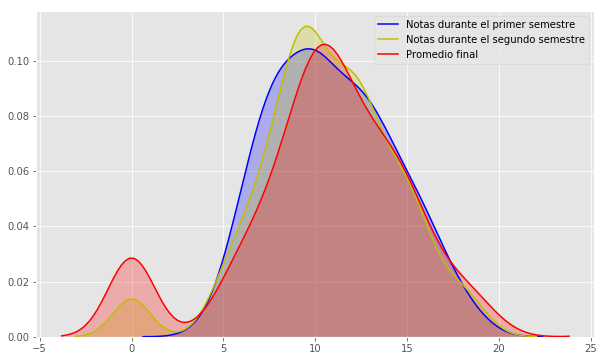

In [43]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_dropped['G1'], color="b", shade=True, label="Notas durante el primer semestre")
sns.kdeplot(df_dropped['G2'], color="y", shade=True, label="Notas durante el segundo semestre")
sns.kdeplot(df_dropped['G3'], color="r", shade=True, label="Promedio final")
plt.legend()

__Podemos observar que las notas de los estudiantes en el segundo semestre mejoraron en comparación con el primer semestre. El promedio final de los estudiantes tiene una distribución similar a las notas durante el segundo semestre pero con un rango menor.__